In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
# !git clone https://github.com/fastai/course-v4 'drive/My Drive/course-v4'

In [0]:
!pip install fastai2 > ../dev/null

In [0]:
# note: the "> ../dev/null" above just prevents the cell 
# from outputting all the install verbosity ;)

# Import the vision library

In [0]:
from fastai2.vision.all import *  

# Find the Dogs vs Cats DataSet
In Fastai, the URLs variable contains urls towards various datasets. 
We'll take advantage of notebooks' capabilities here.

In the following cell, type "URL." and wait for a second. 

You should see different options appearing (starting with "ADULT_SAMPLE" and "AG_NEWS"...)

In [7]:
URLs.DOGS

'http://files.fast.ai/data/examples/dogscats.tgz'

Click [here](https://course.fast.ai/datasets) to learn what those links contain, and complete the url variable below:

In [0]:
url_pointing_towards_dogsvcats = URLs.DOGS   
assert url_pointing_towards_dogsvcats == 'http://files.fast.ai/data/examples/dogscats.tgz'

# Download the data and find where it was downloaded

Now we will use the "untar_data" function to download the images. 

But first, let's learn what it does exactly. Again, we'll take advantage of the notebook's capabilities.
Type ?untar_data() below and run the cell.

In [0]:
?untar_data() # Get the documentation for untar_data()

In [0]:
# note; you can also try ??untar_data or help(untar_data) and see what they do differently

So, the doc says :

"Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`."

In the class' example, we provide the url, but neither fname nor dest.

So what happens ? Let's find out...

In [10]:
%%bash
mkdir -p /root/.fastai/archive
cd /root/.fastai/archive
wget -c http://files.fast.ai/data/examples/dogscats.tgz
tar xf dogscats.tgz
 

--2020-03-31 07:02:59--  http://files.fast.ai/data/examples/dogscats.tgz
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 839285364 (800M) [application/x-gtar-compressed]
Saving to: ‘dogscats.tgz’

     0K .......... .......... .......... .......... ..........  0%  114K 2h0m
    50K .......... .......... .......... .......... ..........  0%  227K 90m15s
   100K .......... .......... .......... .......... ..........  0% 50.2M 60m15s
   150K .......... .......... .......... .......... ..........  0% 17.1M 45m23s
   200K .......... .......... .......... .......... ..........  0%  230K 48m10s
   250K .......... .......... .......... .......... ..........  0% 15.1M 40m17s
   300K .......... .......... .......... .......... ..........  0% 27.8M 34m35s
   350K .......... .......... .......... .......... ..........  0% 32.2M 30m19s
   400K .......... ......

In [0]:
# pass the url you defined above to untar_data:

path = untar_data(url_pointing_towards_dogsvcats)  # Replace the ____ 
assert path.name == 'dogscats'

In [12]:
print(path)

/root/.fastai/data/dogscats


As you can see, since we didn't give any fname or dest to the untar_data function, it chose its own default and store your data in a private directory called .fastai/data

In [13]:
# This is interesting !
type(path)

pathlib.PosixPath

As you can see, "path" is not just a string storing the directory where you data was downloaded. It is a PosixPath.

PosixPathes have a bunch of fun methods. For example, try this:

In [14]:
path.ls()

(#4) [Path('/root/.fastai/data/dogscats/sample'),Path('/root/.fastai/data/dogscats/valid'),Path('/root/.fastai/data/dogscats/test1'),Path('/root/.fastai/data/dogscats/train')]

So, this url provides us with four folders:

- test1
- train
- valid
- sample

This is interesting ! The course example created the dataloaders by taking advantage of the fact that the cats images started with an Uppercase letter. 

This won't always be the case ! What should we do ? Rename all our pictures so that one class starts with uppercase and the other doesn't ??

Well, the example we have here has another approach, they store different categories in different folders. Let's see: 

In [15]:
(path/'train').ls()  # Yes, you can add a folder to a PosixPath like so ;)
# in the "train" folder, there are two other folders: dogs, and cats. 
# Luckily for us, fastai provides us with an api that deals 
# With this kind of data splitting

(#2) [Path('/root/.fastai/data/dogscats/train/dogs'),Path('/root/.fastai/data/dogscats/train/cats')]

# Create DataLoaders using folders 
(not the file's name)

In [0]:
# Again, use the notebooks capabilities to find what you need;
# start by typing "ImageDataLoaders." and wait until you get a list of options
# can you guess which one you could use ? ;-) 
?ImageDataLoaders.from_folder()

In [0]:
# replace this with the method you found above
# if you didn't find it (or need a hint), I put as many "_" as there are
# letters in the method you are looking for
dls = ImageDataLoaders.from_folder(path,
                                   item_tfms=Resize(224)) 

# Don't worry about the Resize() for now, we'll see what this does latter
assert isinstance(dls, DataLoaders)

Congratulations !!!! 

You created your first dataloaders. Those are cool things where fastai does a lot for you !

For example, try the following: 


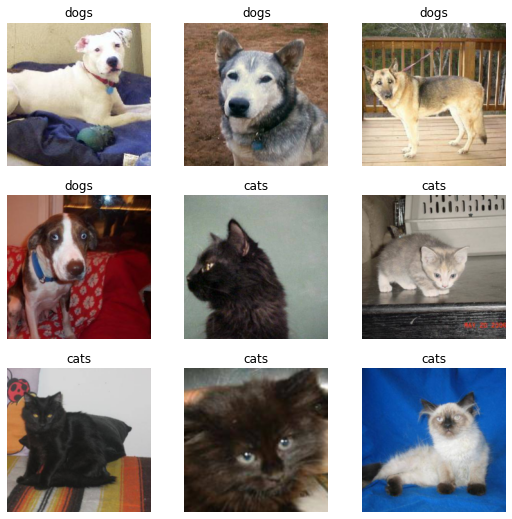

In [18]:
dls.show_batch()  # Un-comment the cell. Cool, heh ? 

# Use our dataloaders to train a deep learning model !
The only lines from the course we haven't covered are the following ones:

In [0]:
# learn = cnn_learner(dls, resnet34, metrics=error_rate)
# learn.fine_tune(1)

Can you guess what you need to change in our case ?
That's right, <b>absolutely nothing !!</b>
You'll find that most of the time, pipeline-ing your data into dataloaders is
the hardest part (at least that's the way I see it). Once this is done, it's a 
matter of creating your learner, and train it.



In [0]:
# You'll learn more about learners and training in the future. 
# For now, just type the first line of code of the cell above here:
# (yes, type it! Don't copy paste. You are here to practice ;) )
learn = cnn_learner(dls, resnet34, metrics=error_rate)
assert isinstance(learn, Learner)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
# Now, type the second line above and train your model:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.086335,0.040765,0.017430,01:50


epoch,train_loss,valid_loss,error_rate,time
0,0.047416,0.041508,0.015438,01:57
1,0.020179,0.027081,0.007470,01:55


In [0]:
# Now, you should start gaining the habit of using object. and waiting to see 
# your options

# If you do that with your "learn" object ('learn.' and wait..), you should find
# a method to show the results of the model. Try it !

learn.show_results()

# if you didn't find it, hint: learn.____________()

# Recap

you just trained a model that differentiates between cats and dogs. Can you do it again with less help ? 

## Find the url:

In [0]:
url_dogsvcats = URLs.DOGS

## Untar it:

In [0]:
path = untar_data(url_dogsvcats)

##Create dataloaders:

In [0]:
dls = ImageDataLoaders.from_folder(path,
                                   item_tfms=Resize(224))

## Create the Model

In [0]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

##Train the model

In [0]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.104040,0.037438,0.013446,02:10


epoch,train_loss,valid_loss,error_rate,time
0,0.030187,0.020259,0.007470,02:28


## See results !

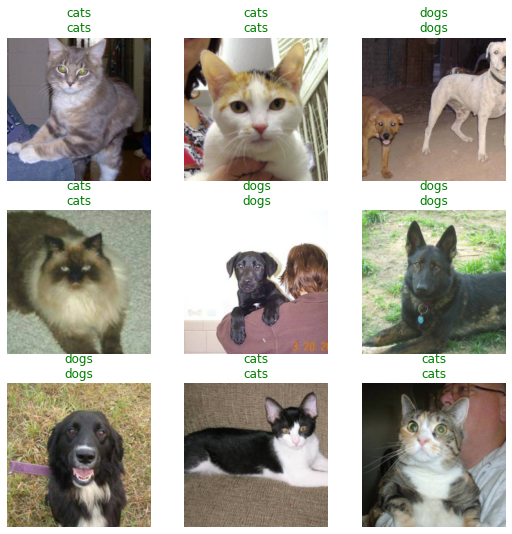

In [0]:
learn.show_results()

Now, wouldn't you like to put that model online to impress your family and frieds. We'll that's coming with next week's lesson. Stay tuned ;) 